# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


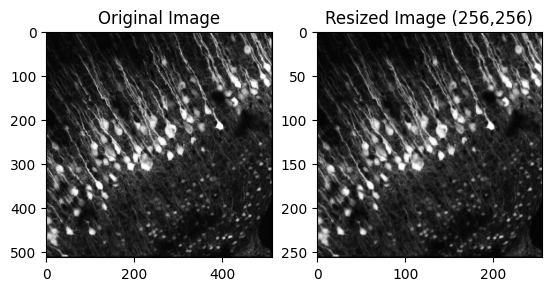

In [2]:
cell_img = plt.imread('data/cells.png')

resized_cell_img = resize(cell_img,(256,256), anti_aliasing=True)

plt.figure()

#Original
plt.subplot(1,2,1)
plt.imshow(cell_img, cmap="grey")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(resized_cell_img, cmap="grey")
plt.title("Resized Image (256,256)")



plt.show()


**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [3]:
cell_ft = np.fft.fft2(cell_img)
cell_ft.dtype 

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [4]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

print(amplitude)
print(phase)

[[53963.80921358  2842.94352588  1699.52941224 ...  2017.57017083
   1699.52941224  2842.94352588]
 [10334.92448829 13442.82168215  3253.73385589 ...  2492.02875405
   2049.60445663  3334.85761478]
 [  523.6087822   5349.12946843  2449.0245062  ...   586.71541068
   1007.7876239   2802.23362971]
 ...
 [ 2627.67235682   984.4731677   2158.29790273 ...  1580.17477268
   2581.72526819  2494.94774356]
 [  523.6087822   2802.23362971  1007.7876239  ...  1718.61975507
   2449.0245062   5349.12946843]
 [10334.92448829  3334.85761478  2049.60445663 ...  2969.50695322
   3253.73385589 13442.82168215]]
[[ 0.         -2.70053359  1.27456878 ... -1.84790763 -1.27456878
   2.70053359]
 [-2.82490293  0.43178715  0.1512756  ...  2.77071756 -2.82156698
  -1.58142899]
 [-1.18765253 -2.22656153  0.07680855 ... -0.01710254  2.9754289
  -2.98877631]
 ...
 [-2.16059752 -1.83312056 -1.1223374  ...  0.03234677  3.11877427
  -0.7680948 ]
 [ 1.18765253  2.98877631 -2.9754289  ...  0.93949694 -0.07680855
   2.2

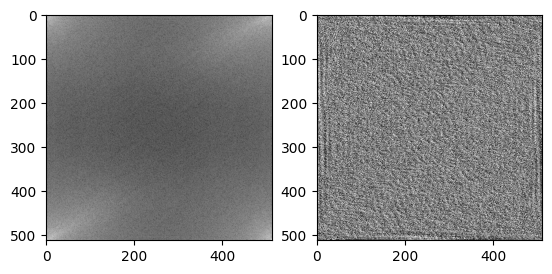

In [5]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


[[0.88235354 4.97664343 4.3435463  ... 1.45281625 4.3435463  4.97664343]
 [6.31316693 4.98939623 1.324524   ... 7.12778223 6.7861408  5.1135389 ]
 [2.10917891 6.17314883 3.36686491 ... 9.57392412 5.13035074 9.55485322]
 ...
 [4.74927318 7.17444732 0.28239434 ... 5.39372287 2.64471861 3.62599979]
 [2.10917891 9.55485322 5.13035074 ... 3.8008006  3.36686491 6.17314883]
 [6.31316693 5.1135389  6.7861408  ... 3.13385208 1.324524   4.98939623]]
[[ 3.14159265  1.22353994 -1.05156963 ... -2.24001117  1.05156963
  -1.22353994]
 [-2.6082175  -2.6993792  -1.5533755  ... -2.94188812  2.82861856
  -3.13984688]
 [-2.48444958 -3.13978817 -2.64122491 ...  1.30966974  0.79789458
   1.91180621]
 ...
 [-1.79608458 -1.00762947 -1.48374417 ...  0.09797631 -0.79000012
  -0.24486362]
 [ 2.48444958 -1.91180621 -0.79789458 ... -3.13491582  2.64122491
   3.13978817]
 [ 2.6082175   3.13984688 -2.82861856 ...  0.85118719  1.5533755
   2.6993792 ]]


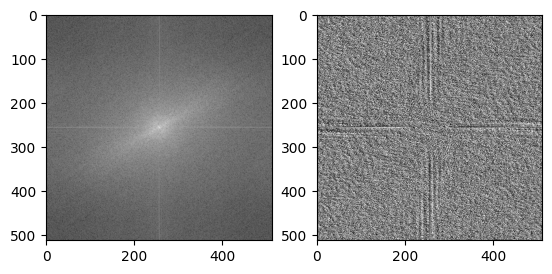

In [6]:
new_cell_ft = np.fft.fftshift(cell_ft)
new_amplitude = np.abs(new_cell_ft)
new_phase = np.angle(new_cell_ft)

print(new_amplitude)
print(new_phase)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(new_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(new_phase, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


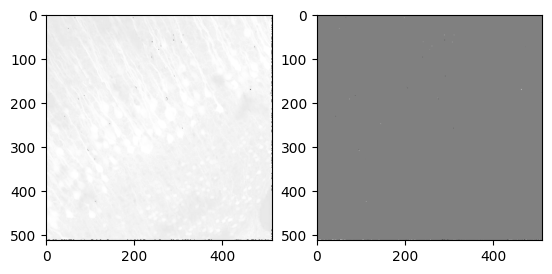

In [7]:
shift_restored_cell_ft = np.fft.ifftshift(new_cell_ft)

restored_cell_ft = np.fft.ifft2(shift_restored_cell_ft)

restored_amplitude = np.abs(restored_cell_ft)
restored_phase = np.angle(restored_cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(restored_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(restored_phase, 'gray')

---


**[Task 2 (a).]()** Load the brain CT image.


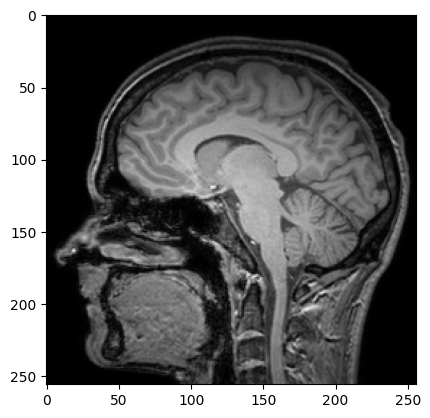

In [8]:
brain_ct = plt.imread("/workspaces/Lutz-tries-to-code/data/brain_ct.png")
plt.imshow(brain_ct, cmap="grey")
plt.show()

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


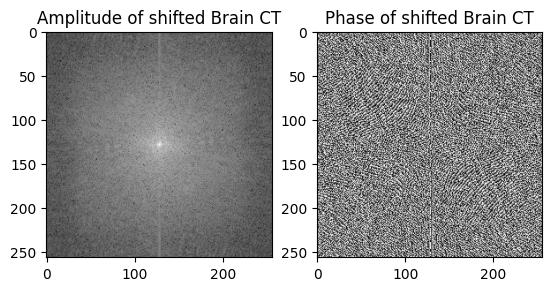

In [13]:
brain_ft = np.fft.fft2(brain_ct)
shifted_brain_ft = np.fft.fftshift(brain_ft)

shifted_brain_amplitude = np.abs(shifted_brain_ft)
shifted_brain_phase = np.angle(shifted_brain_ft)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(shifted_brain_amplitude), cmap="grey")
plt.title("Amplitude of shifted Brain CT")

plt.subplot(1,2,2)
plt.imshow(shifted_brain_phase,cmap="grey")
plt.title("Phase of shifted Brain CT")

plt.show()

In [10]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [11]:
filter_window_size = 50

**[Task 3 (b).]()** Create a highpass filter maks.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [12]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

NameError: name 'brain_img' is not defined

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
